# Лабораторная работа #3

- **Материалы для ЛР расположены в гугл-папке [чтение по ссылке]:
“НСиНК-2023.09_[для студентов]”, URL:** [**https://clck.ru/35bHRL**](https://clck.ru/35bHRL)

## Цель работы

Знакомство c принципами работы свёрточных нейронных сетей для задачи классификации изображений с использованием библиотеки Tensorflow.

# Ход работы

- Загрузить набор данных FashionMNIST и осмотреть состав выборки.
- Зафиксировать в отчёте:
    - Кол-во образцов
    - Кол-во и состав меток классов

- Выбрать 3 случайных образца и получить их графические изображения

- Преобразовать все значения исходных данных к нормализованному диапазону [0.0, 1.0]

- Применить приём "one-hot encoded" для кодирования меток класса обучающего и проверочного наборов


- Ознакомиться с понятием, принципом и параметрами операций свёртки и объединения

<br>

- Выполнить подготовительную часть задания
    - Получить параметры слоёв по варианту
    - Создать или загрузить одиночное изображение размером 28х28 пикселей для работы в подготовительной части
    - Создать отдельный свёрточный слой с указанием параметров: кол-во фильтров, размер окна, шаг окна
    - Задать значение матрицы весов свёрточного слоя
    - Отобразить графически веса окна свёртки
    - Применить операцию свёртки к выбранному изображению
    - Вычислить предполагаемый размер изображения после операции

    - Создать отдельный объединяющий слой с указанием параметров: вид операции агрегации, размер окна, шаг окна
        - Применить операцию свёртки к выбранному изображению
        - Вычислить предполагаемый размер изображения после операции

<br>

- Выполнить основную часть задания
    - Выбрать архитектуру  и параметры свёрточной нейронной сети (НС)
    - Создать НС и зафиксировать кол-во параметров
    - Последовательно обучить НС с несколько подходов, по 3-5 эпох в каждом подходе, фиксируя в отчёте общие оценки точности :
        - Матрицы ошибок (Confusion Matrix)
        - Числовые метрики Precision и  Recall
    - Осмотреть результаты классификации для одиночный изображений:
      - для изображений классифицированных ошибочно
      - для изображений классифицированных верно

## Требования к отчету
<font color='red'>
Формат отчёта: *doc, *docx
<br>Название отчета должно быть в формате: АВТ-0xx_ЛР-xx_Фамилия1_Фамилия2</font>

1. Параметры обучающей (train) и проверочных (test) выборок:
- Размер (кол-во образцов)
- Кол-во и перечисление меток классов
- 3 примера графический изображений выбранных образцов
- Диапазон значений пикселей

<br>

2. Подготовительная часть:
- Размер и графический вид выбранного одиночного изображения
- Параметры свёрточного слоя
- Весовые коэфф. и графический вид окна свёртки
- Размер изображения после свёртки
- Графический вид изображения после свёртки
- Параметры объединяющего слоя
- Размер изображения после применения операции объединения
- Графический вид изображения после операции объединения

<br>

3. Основная часть
- Архитектура свёрточной НС с описанием последовательности и параметров выбранных слоёв
- Кол-во весовых коэфф.  (parasms) свёрточной НС
- Графики истории изменения функции потерь (Loss) по эпохам
- для 2-3 состояний в процессе обучения по эпохам общая оценка точности классификации изображений в виде
    - матрицы ошибок (Confusion Matrix)
    - числовых метрик precision recall

- Выводы и краткие описания полученных результатов

`*`Результаты сравнения скорости обучения и точности классификации изображений НС многослойного перцептрона и свёрточной НС


# Библиотеки

Для выполнения работы потребуется установить библиотеки:
- tensorflow - для работы с нейронными сетями (требует ~400 МБ интернет трафика)
- plotly - для отображения 3d графиков

Команда для установки:
```
> …Путь_к_Python\python -m pip install --upgrade pip
> …Путь_к_Python\Scripts\pip3  install jupyterlab
> …Путь_к_Python\Scripts\pip3  install pandas  numpy  scikit-learn
> …Путь_к_Python\Scripts\pip3  install plotly seaborn matplotlib
> …Путь_к_Python\Scripts\pip3  install tensorflow==2.12.1  streamlit
```

In [1]:
# Проверка версии и пути к выбранному интерпретатору
import sys
print(f"Версия Python - {sys.version}")
print(f"Путь к интерпретатору Python - {sys.executable}")

Версия Python - 3.9.6 (tags/v3.9.6:db3ff76, Jun 28 2021, 15:26:21) [MSC v.1929 64 bit (AMD64)]
Путь к интерпретатору Python - c:\users\user1\appdata\local\programs\python\python39\python.exe


In [2]:
# Python 3.10
import pandas as pd
import numpy  as np
import sklearn
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import classification_report

%matplotlib inline
from IPython.display import clear_output
from matplotlib import pyplot as plt
from matplotlib import cm
import seaborn as sns
import plotly.graph_objects as go

In [3]:
import tensorflow as tf
from   tensorflow.keras import layers, activations, losses, optimizers, metrics # импорт для более короткой записи

In [4]:
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))
#tf.debugging.set_log_device_placement(False)
#tf.config.set_soft_device_placement(False)

Num GPUs Available:  0


In [5]:
# Проверка версий библиотек
for lib in [pd, np, sklearn, tf]:
    print(f"{lib.__name__:<12} {lib.__version__}")

pandas       2.1.0
numpy        1.24.3
sklearn      1.3.0
tensorflow   2.12.1


In [6]:
import time

- - - - -

# Вспомогательные функции
Определим вспомогательную функции для вывода изображений и вычислений модели

In [7]:
def imshowWithAnnotValue(dataImage):
    """
    Отображает черно-белое изображение с просмотром значений пикселей
        - dataImage: матрица значений пикселей
    """
    # Вывод изображения
    maxVal =  dataImage.max()
    minVal =  dataImage.min()
    rangeVal = maxVal - minVal
    print(minVal, maxVal, rangeVal)

    plt.figure(figsize=(10,10)) # создать полотно для рисования, figsize-размер в дюймах
    shw = plt.imshow(# отобразить массив как изображение
        X=dataImage, # данные
        cmap="gray",  # название цветовой шкалы
        vmin=minVal, vmax=maxVal, # границы цветовой шкалы
        interpolation=None, filternorm=True # отключить сглаживание и размытие
    )
    plt.grid(False)
    bar = plt.colorbar(shw) # отобразить цветовую шкалу

    ax = plt.gca()
    nrow = dataImage.shape[0]
    ncol = dataImage.shape[1]

    # Нанести подписей значений для каждого элемента
    for i in range(nrow):
        for j in range(ncol):
            if dataImage[i, j] > 0.3*(rangeVal+minVal):  myColor = "black"
            else:     myColor = "white"
            #print (i, j, myColor, dataImage[i, j])

            text = ax.text(j, i,
                           f"{dataImage[i, j]:.0f}" if maxVal>1 else f"{dataImage[i, j]:.1f}",
                           ha="center", va="center", color=myColor, fontweight="normal", fontsize=7)
    plt.show()  # отрисовать содержимое полотна

In [8]:
def calcAndPlotConfusionMatrix (y_test_all_labels, y_pred_all_labels):
    """
    Вычисляет и отображает графически матрицу ошибок
        - y_test_all_labels,  # ожидаемые/проверочные метки классов
        - y_pred_all_labels,  # вычисленные метки классов
    """

    # Создать матрицу ошибок как массив
    cm = tf.math.confusion_matrix(
        labels      =y_test_all_labels,  # ожидаемые/проверочные метки классов
        predictions =y_pred_all_labels,  # вычисленные метки классов
    ).numpy()
    cmStr = cm.astype('str') # представить значения как строки
    cmStr [cmStr =='0'] = '' # убрать нули

    print(cm)
    # Отобразить матрицу ошибок в графическом виде
    plt.figure(figsize=[5,5])
    ax= sns.heatmap(
                data=cm, # Матрица значений
                cmap="rocket_r", # Цветовая палитра. crest viridis_r rocket_r
                #annot=True,  fmt='d',
                annot=cmStr,  fmt='s', # Подписи в ячейках матрицы
                annot_kws={"size": 10}, square = True)
    ax.set_xlabel('Вычисленный класс')
    ax.set_ylabel('Ожидаемый класс')
    ax.set_title(f'Матрица ошибок. {len(totalHistoryLossTrain)} эпох')
    ax.set_xticklabels(class_names)
    ax.set_yticklabels(class_names)
    plt.xticks(rotation=70)
    plt.yticks(rotation=0)
    plt.show()

In [9]:
def checkPrediction(  model,  imagesArray, labelsArray, indexOfImages):
    '''
    Решение случайного образца из data_loader указанной моделью
        - model - обученая модель
        - imagesArray - массив numpy с множеством изображений
        - labelsArray - массив numpy с номерами истинных меток классов
        - indexOfImages - порядковый номер выбранного изображения в imagesArray
    '''
    # Получить одиночное изображение по индексу
    img = imagesArray[indexOfImages]

    # Получить истинную метку класса
    y_true_prob  = labelsArray[indexOfImages] # Вероятности каждого класса
    y_true_label = np.argmax(y_true_prob)    # Номер макс. вероятного класса

    # Получить ответ модели
    y_pred_prob  = model( np.expand_dims(img, axis=0) ) # Вероятности каждого класса
    y_pred_label = np.argmax(y_pred_prob)              # Номер макс. вероятного класса

    # Графики ---------------------------------
    f, (ax1, ax2) = plt.subplots(figsize=(7,3), nrows= 1, ncols= 2,  )

    # График. Вывести исходное изображение
    ax1.imshow(img, cmap="gray")
    ax1.set_title("Исходное изображение")

    # График. Вывести вероятности принадлежности
    barColors=['black'] * len(class_names)
    barColors[y_pred_label] = "orange"    # предпологаемый класс - оранжевый
    barColors[y_true_label] = "limegreen" # истинный класс - зелёный

    y_pos  = np.arange(len(class_names))
    ax2.barh( y=y_pos, width=y_pred_prob.numpy()[0], color=barColors, height = 0.8)
    ax2.set_yticks(y_pos, labels=class_names)
    ax2.set_title("Вероятность принадлежности к каждому классу")
    ax2.bar_label( ax2.containers[0], fmt='%.2f')
    ax2.invert_yaxis()
    ax2.set_xlim([0.0, 1.0])

    # Отобразить графики
    plt.tight_layout()
    plt.show()

    # Текстовая информация ---------------------------------
    print(f"Метка класса:")
    print(f"  - Истинная    TRUE_Label = {y_true_label} {class_names[y_true_label]}")
    print(f"  - Вычисленная PRED_Label = {y_pred_label} {class_names[y_pred_label]}")
    print('Вероятность принадлежности к каждому классу:')
    for i, probability in enumerate(y_pred_prob[0]):
        print(f'  - Класс_{i} {class_names[i]:>12} : вероятность {probability:>7.1%}' ,end='')
        if i==y_pred_label and y_true_label!=y_pred_label:  print('!!!Ошибка!!!',end='')
        print()

# Подготовка данных

## Загрузка данных FashionMNIST

Набор данных Fashion MNIST содержит изображения отдельных предметов одежды с низким разрешением (28 на 28 пикселей в оттенках серого). Общее кол-во изображений 70 000 по 10 категориям-классам.

<div style="max-height:200px;  ">
    
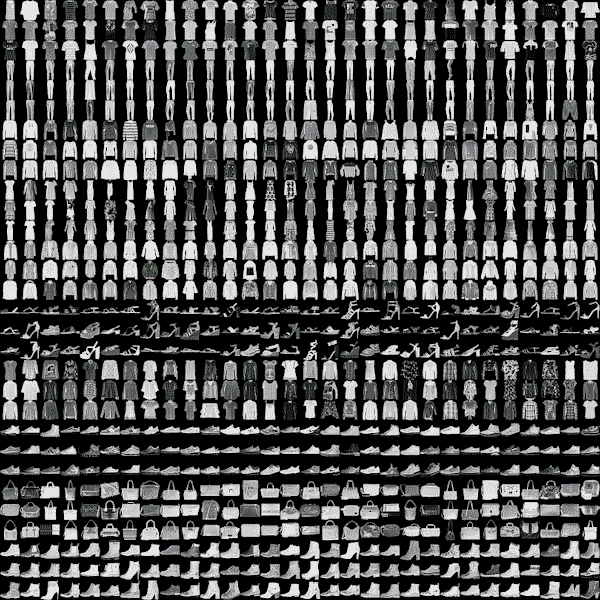
</div>

Одним из способов загрузки данных является использование встроенной функции `tf.keras.datasets.fashion_mnist.load_data()`

In [10]:
fashion_mnist = tf.keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

4422102/4422102 [==============================] - 1s 0us/step


### Размер выборки

В результате работы функции будут сформированы две пары массивов Numpy: обучающий (train) и проверочный (test) наборы. Каждая пара содержит массив изображений (_images) со значениями яркостей пикселей и массив меток (_labels) с информацией о принадлежности каждого изображения к одному из классов.

In [11]:
# --------------------------------------------------
print('Тип данных структуры train_images ', type(train_images))
print('Тип данных структуры train_labels ', type(train_labels))

print('\nСостав:')
print('  - обучающего   набора изображений:', train_images.shape)
print('  - проверочного набора изображений:', test_images.shape)
print('  - обучающего   набора меток:', train_labels.shape)
print('  - проверочного набора меток:', test_labels.shape)

Тип данных структуры train_images  <class 'numpy.ndarray'>
Тип данных структуры train_labels  <class 'numpy.ndarray'>

Состав:
  - обучающего   набора изображений: (60000, 28, 28)
  - проверочного набора изображений: (10000, 28, 28)
  - обучающего   набора меток: (60000,)
  - проверочного набора меток: (10000,)


Изображения представляют собой массивы NumPy 28x28 со значениями пикселей в диапазоне от 0 до 255.

In [12]:
train_images[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   1,
          0,   0,  13,  73,   0,   0,   1,   4,   0,   0,   0,   0,   1,
          1,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
          0,  36, 136, 127,  62,  54,   0,   0,   0,   1,   3,   4,   0,
          0,   3],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   6,
          0, 102, 204, 176, 134, 144, 123,  23,   0,   0,   0,   0,  12,
         10,   0],
       [  

Каждая метка изображения представляет собой целое число от 0 до 9 - номер класса.

In [13]:
train_labels

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [14]:
print('\nУникальных классов:', np.unique(test_labels))


Уникальных классов: [0 1 2 3 4 5 6 7 8 9]


Зададим соответвующие номерам классов имена.

In [15]:
class_names = ['T-shirt/top', # Футболка/топ
               'Trouser',     # Брюки
               'Pullover',    # Пуловер/джемпер
               'Dress',       # Платье
               'Coat',        # Плащь/пальто
               'Sandal',      # Сандалии
               'Shirt',       # Рубашка/сорочка
               'Sneaker',     # Кроссовки
               'Bag',         # Сумка
               'Ankle boot'   # Обувь с высоким берцем
              ]

[6000 6000 6000 6000 6000 6000 6000 6000 6000 6000]


Text(0.5, 1.0, 'Кол-во каждого представителя класса')

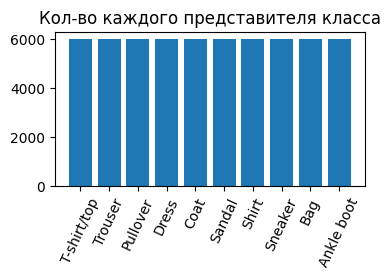

In [16]:
clNum , counts = np.unique(train_labels, return_counts=True)

print(counts)
plt.figure(figsize=(4,2))
plt.bar(class_names, counts)
plt.xticks(rotation=65)
plt.title("Кол-во каждого представителя класса")

### Просмотр случайного образца

Выведем графическое представление одиночного изображения. Для этого выберем индекс (порядковый номер) элемента из исходного массива

In [17]:
# Случайный индекс от 0 до размера тренировочной выборки
indexOfImgs = np.random.randint(low=0, high=train_images.shape[0])

# Получить черно-белое изображение, как массив значений яркости пикселей
dataImage = train_images[indexOfImgs]

# Получить истинную метку - принадлежность изображение к одному из 10 классов
y_true= train_labels[indexOfImgs]

In [18]:
print ("Номер изображения:    ", indexOfImgs  )
print ("Размер изображения:   ", dataImage.shape  )
print ("Истинный класс y_true:", y_true, class_names[y_true], )

Номер изображения:     23368
Размер изображения:    (28, 28)
Истинный класс y_true: 4 Coat


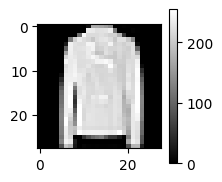

In [19]:
# Вывод изображения в простой форме
plt.figure(figsize=(2,2))  # создать полотно для рисования, figsize-размер в дюймах
shw = plt.imshow(# отобразить массив как изображение
    X=dataImage,  # данные
    cmap="gray",  # название цветовой шкалы
    interpolation=None, filternorm=True # отключить сглаживание и размытие
)
plt.grid(False)
bar = plt.colorbar(shw) # отобразить цветовую шкалу
plt.show()  # отрисовать содержимое полотна

Каждое изображение состоит из отдельных пикселей, которые будут являться входными признаками X нейронной сети. Используем функцию `imshowWithAnnotValue` для отображения значений каждого пикселя

0 255 255


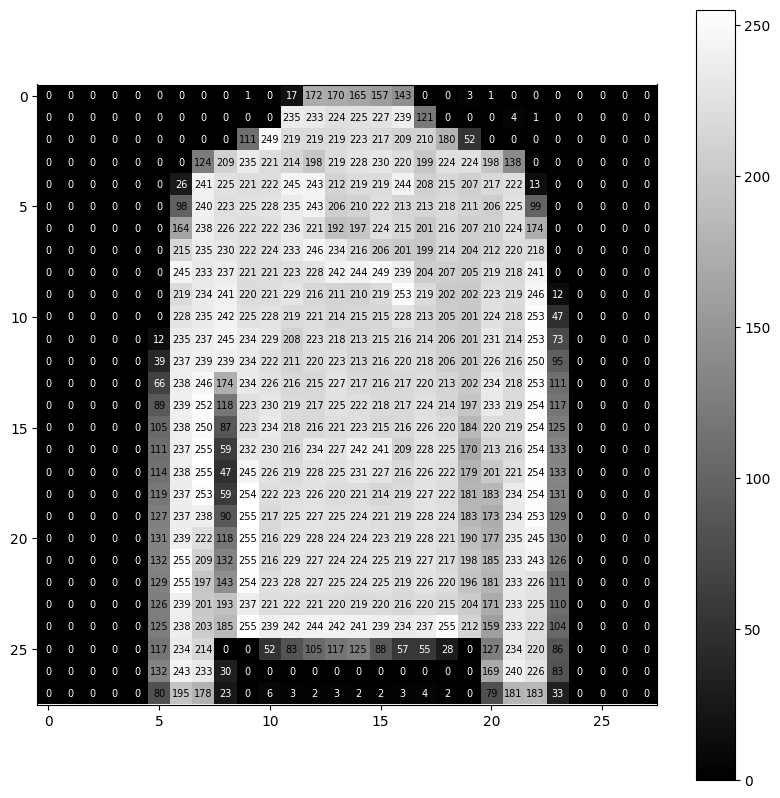

In [20]:
imshowWithAnnotValue(dataImage)

## Модификация значений

Для корректной работы нейросети необходимо обеспечить тип данных float и нормализовать исходные значения пикселей, т.е. привести их к диапазону [0.0, 1.0]

In [21]:
train_images = train_images.astype('float32')
test_images  = test_images.astype('float32')

train_images = train_images / 255.0
test_images  = test_images  / 255.0

In [22]:
train_images[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

## Кодирование меток классов "one-hot encoded"

В данный момент метки класса каждого изображения находится в общем списке в виде целочисленных значений

In [23]:
train_labels

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [24]:
test_labels

array([9, 2, 1, ..., 8, 1, 5], dtype=uint8)

Получим уникальные значения меток классов каждой из частей массива.

In [ ]:
print('\nУникальных классов:', np.unique(train_labels))
print('\nУникальных классов:', np.unique(test_labels))

Для дальнейшей работы нам потребуется сформировать отдельный признак-столбец для каждого уникального класса с информацией о принадлежности к соответствующему классу.  Нужное преобразование выполняет функция `tf.keras.utils.to_categorical()`

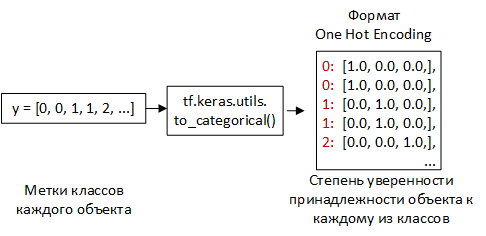

In [25]:
train_labels =  tf.keras.utils.to_categorical(train_labels)
test_labels  =  tf.keras.utils.to_categorical(test_labels)

print("train_labels", '\n  Изображений образцов', train_labels.shape[0], '\n  Столбцов-индикаторов для каждого класса', train_labels.shape[1])
print(train_labels)
print()
print("test_labels"'\n  Изображений образцов', test_labels.shape[0], '\n  Столбцов-индикаторов для каждого класса', test_labels.shape[1])
print(test_labels)

train_labels 
  Изображений образцов 60000 
  Столбцов-индикаторов для каждого класса 10
[[0. 0. 0. ... 0. 0. 1.]
 [1. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]

test_labels
  Изображений образцов 10000 
  Столбцов-индикаторов для каждого класса 10
[[0. 0. 0. ... 0. 0. 1.]
 [0. 0. 1. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 1. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


# Свёрточная НС.

В свёрточных нейронных сетях используются дополнительные слои для понижения размерности исходной матрицы признаков (разрешения изображения). Понижение размерности проводится повторяется многократно, но выполняется двумя видами операций:
- свёртки (convolution)
- объединения (пулинга, pooling)

Группа слоёв свёртки и объединения носит название блока выделения признаков из изображения, т.к. значительно понижает кол-во пикселей, при этом обеспечивает возможность различать исходные изображения. Набор значений, полученных после «блока извлечения новых признаков», предаётся на группу полносвязных слоёв (MLP), где и происходит определение принадлежности к искомым классам.
Таким образом сверхточная нейронная сеть состоит из основных частей:
- "блока извлечения признаков" из изображения
- "блока классификации"



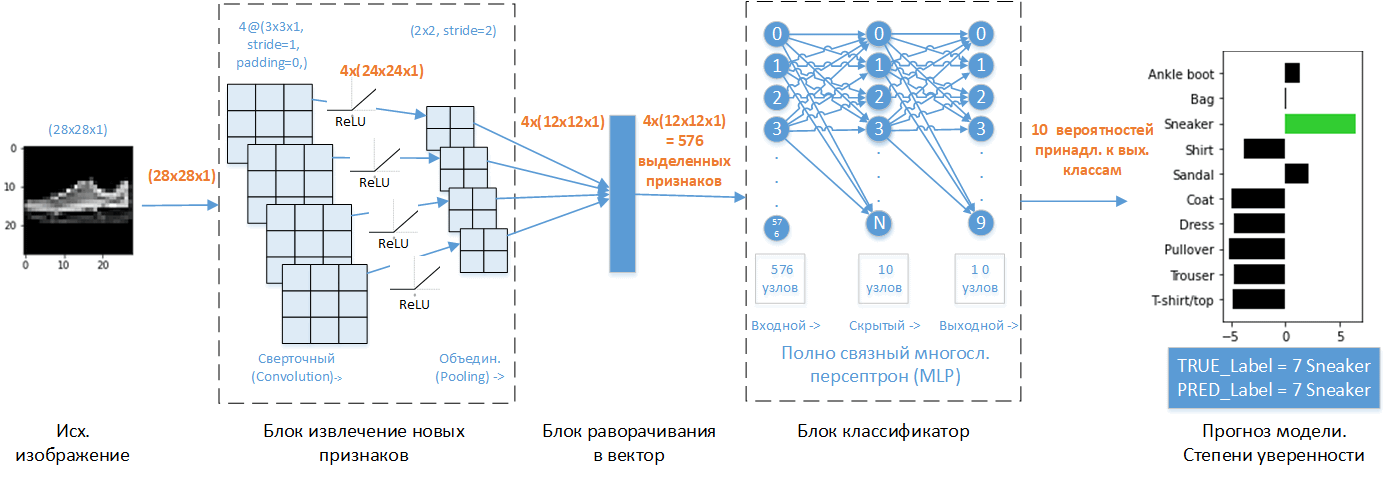

### Сверточный слой (Convolution)

Двумерная свертка (2D convolution) - операция преобразования группы исходных пикселей (признаки) в меньшую группу пикселей (признаков).

Для этого используется фильтр (ядро-матрицу, окно свёртки) размером FxF (пример 3x3). Фильтр содержит веса для математического преобразования значений исходных пикселей в один итоговый.
- Исходная матрица 5x5 = 255 признаков
- Выходная матрица 3x3 = 9 признаков

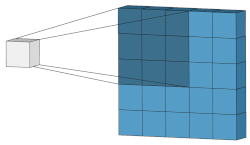

Исходное изображение (W, H, Ch) имеет параметры:
- ширина в пикселях - W
- высота в пикселях - H
- количество цветовых каналов - Ch

Фильтр (ядро-матрица, окно свёртки) размером (F, F, Ch) (пример 3x3x1) имеет параметры:
- Количество каналов цвета - Сh
- Размер фильтра (ядра-матрицы, окна свёртки) (kernel_size) - F
- Значения ячеек фильтра (ядра-матрицы, окна свёртки, kernel)
- Фильтр (F, F, 1) имеет (F * F * 1) + 1 весов (добавляется свободный член)

Ниже представлена демонстрация работы фильтра размером (3, 3, 1) = 3x3x1 с весами

      [0, 1, 2]
      [2, 2, 0]
      [0, 1, 2]

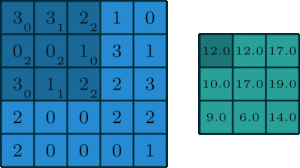

Каждый сверточный (k@FxFxCh) слой `tf.keras.layers.Conv2D` имеет параметры:
- filters: количество фильтров - k
- kernel_size: размер, единый для всех фильтров слоя (ядр-матриц, окон свёртки, kernel) - F
- stride: размер шага окна свёртки
- padding: размер обрамления в ситуации, когда шаг и размером окна свёртки выходит за границы изображения
- значение весов свёрточного слоя = числовые значения в фильтрах.
    
Запись формата k@FxFxCh или k@FxFx (пример 6@5x5x1) означает,
    
    что свёрточный слой имеет k фильтров,
    каждый из которых - (F, F, Ch).
    
Количество весов вычисляется как (k * (F * F * Ch)) + (1 * k) весов (последнее "+1*k" -- так как у каждого фильтра есть ещё параметр смещения bias)

#### Padding

Padding добавляет дополнительные пиксели (обрамляет) для того, чтобы крайние пиксели исходгой матрицы могли попасть в цент ядра-матрицы.

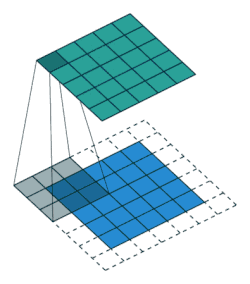

#### Striding

Striding - пропуск/перескакивание некоторых областей исходного изображения. Достигается увеличением шага перемещения ядра-матрицы.

- Шаг stride=1 означает, что беруться пролеты через пиксель, то есть по факту каждый пролет является стандартной сверткой.
- Шаг stride=2 означает, что пролеты совершаются через каждые два пикселя, пропуская все другие пролеты в процессе и уменьшая их количество примерно в 2 раза
- Шаг stride=3 означает пропуск 3-х пикселей, сокращая количество в 3 раза и т.д.

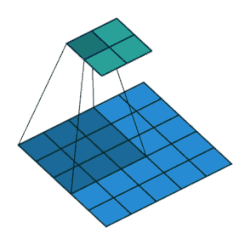

### Объединяющий слой (Пулинг, Pooling)

Объединяющий слой (также употребляются названия Subsampling, Cубдискритизирующий, Пулинг, Pooling), схож со светрочным, но __фильтр (ядро-матрица, окно свёртки, kernel) этого слоя не имеет весов__, а использует агрегатную функцию. Применяется для уменьшения размера исходных изображений (признаков), уменьшения шумов, выделение доминирующего признака.

Выделяют два типа агрегатных функций:
- выбор максимального значения (Max Pooling)   из части изображения, покрываемой фильтром.
- вычисление среднего значения (Average Pooling) из части изображения, покрываемой фильтром.

Каждый объединяющий слой, `tf.keras.layers.AveragePooling2D` и `tf.keras.layers.MaxPooling2D`, имеет параметры:
- pool_size: размер окна фильтра
- strides: шаг окна фильтра
- padding: тип обрамления

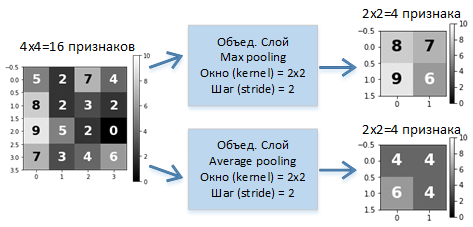

Размер выходного изображения после свёртки или объединения вычисляется по следующей формуле
    
    ((imgSize - filterSize + 2*padding) // stride) +1,

где:
  - imgSize: размер высоты или ширины исходного изображения, пикс.
  - filterSize: размер окна, пикс.
  - padding: размер обрамления, пикс.
  - stride:  размер шага окна свёртки

# Подготовительная часть. Демонстрация и проверка работы свёрточных слоёв

Получим изображение `imgNumpy` размером 28х28 с простой фигурой, к которой последовательно применим свёртку и объединение.

In [ ]:
if not False:
    # Создать прямым вводом значений
    imgNumpy = np.array(
      [[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,  0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 0., 0.,0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 0., 1., 1., 0.,0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 1., 1.,0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 0., 0., 0., 0., 0., 1.,0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 0., 0., 0., 0., 0., 1.,0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 0., 0., 0., 1., 1.,0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 0., 0., 1., 0.,0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 0.,0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 0., 0.,0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 0.,0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 1.,0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 0., 0., 0., 1.,1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 0., 0., 0., 0., 0.,1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 0., 0., 0., 0., 0., 0.,0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1., 1., 0., 0., 0., 0., 0., 0., 0.,0., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.,0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.,0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.,0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.,0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1., 1., 0., 0., 0., 0., 0., 0., 0.,0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 0., 0., 0., 1., 1.,1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 0.,0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype='float')

elif False:
    # Выбрать изображение из исходного набора
    imgNumpy = test_images[10001].copy()
elif False:
    # Загрузить изображение с диска
    img = tf.keras.utils.load_img('./imgs/Путь_к_выбранному_изображению.расширение_файла', target_size=(28,28))
    img = img.convert( mode='1') # преобразовать к черно-белому формату, 1 цветовой канал
    imgNumpy = np.array(img, dtype='float')
    imgNumpy/=255

imgNumpyForConv = imgNumpy.reshape(1,28,28,1) # shape= Размер передаваемого изображения = (batch_size, height, width, channels)

# Отобразить изображение
plt.figure(figsize=(2,2))
plt.imshow(imgNumpy)

## Пример выполнения свёртки (Convolution)

Создайте отдельный свёрточный слой для демонстрации работы. Слой будет содержать два фильтра. Размер и шаг окна свёртки задайте согласно назначенному варианту.

In [ ]:
convLayer = layers.Conv2D(
    filters     =  2 , # Два фильтра
    kernel_size =  ( >>>Размер_окна_свёртки<<<, >>>Размер_окна_свёртки<<<, ) ,
    strides     =  >>>Шаг_окна_свёртки<<< ,
)
# В виду програмный особенностей, для инициализации необходимо сымитировать передачу входных данных определённого размера
# shape= Размер передаваемого изображения = (batch_size, height, width, channels)
convLayer(  np.zeros(shape=(1,28,28,1)) );

У каждого из двух фильтров имеется отдельное окно свёртки - матрица со значениями весовых коэфф., которые будут применяться к исходному изображению. Необходимо установить эти значения для каждого из окон.
Создадим переменную `newWeights` и `newBias`, которая будет содержать значения весовых коэфф. всех окон свёртки.

Последовательно заполните соответствующие элементы `w_i`.

In [ ]:
#convLayer.get_weights()[0].shape
newWeights = np.zeros(((convLayer.kernel_size[0], convLayer.kernel_size[1], 1, convLayer.filters)))

newWeights[:, :, :, 0] = np.random.rand(2, 2, 1)
newWeights[:, :, :, 1] = np.random.rand(2, 2, 1)

# Bias коэфф.
newBias = np.zeros(((2,)))
newBias

Установите значения весовых коэфф. окнон свёртки всех фильтров слоя с помощью функнции `.set_weights()`.

На вход фукнции необходимо передать список из ранее созданных массивов `newWeights` и `newBias`.

Графический вид каждого фильтра будет отображен ниже.

In [ ]:
convLayer.set_weights([newWeights, newBias])

for filterNum in range ( 0, convLayer.filters):
  # Получить элементы соответвующие весам очередноо фильтра
  convWeight_forImshow = convLayer.weights[0][:, :, :, filterNum ]
  #print(convWeight_forImshow)

  # Представить окно свёртки графически
  plt.figure(figsize=(2,2))
  plt.imshow(convWeight_forImshow)
  plt.colorbar(fraction=0.046)
  plt.title(f"Графический вид весов окна свёртки №{filterNum}")
  plt.show()

Примените операцию свёртки и осмотрите результат. Обратите внимание на то, что результат является 4-мерным массивом `(Кол-во_изображений_в_пакете, Высота, Ширина, Кол-во_фильтров)`

In [ ]:
# Применить свёрточный слой convLayer к изобржению imgNumpyForConv
imgNumpyAfterConv = convLayer( imgNumpyForConv )
imgNumpyAfterConv = imgNumpyAfterConv.numpy()  # получить матрицу ка объект библиотеки Numpy

print('Размер ВХодного  изображения: ', imgNumpy.shape, ', преобразовано к:', imgNumpyForConv.shape)
print(f"  Высота: {imgNumpyForConv.shape[1]}")
print(f"  Ширина: {imgNumpyForConv.shape[2]}")
print(f"  Кол-во: {imgNumpyForConv.shape[3]}")

print('Размер ВЫХодного изображения: ', imgNumpyAfterConv.shape)
print(f"  Высота: {imgNumpyAfterConv.shape[1]}")
print(f"  Ширина: {imgNumpyAfterConv.shape[2]}")
print(f"  Кол-во: {imgNumpyAfterConv.shape[3]}")

Свёрточный слой `Conv2D` в результат работы вернёт многомерный массив, но благодаря единственному фильтру данный результат содержит единственное изображение уменьшенного размера.  Двумерное изображение отобразите с помощью функции `.imshow()`.

In [ ]:
for filterNum in range (0, convLayer.filters):
  # Получить элементы соответвующие весам очередноо фильтра
  img_forImshow = imgNumpyAfterConv [:, :, :, filterNum]
  print (img_forImshow.shape)

  # Отобразить изображение
  plt.figure(figsize=(2,2))
  plt.imshow(img_forImshow.squeeze())
  plt.colorbar(fraction=0.046)
  plt.title(f"Результат применения окна свёртки №{filterNum}")

  plt.show()

## Пример выполнения объединения (Pooling)

Создайте объединяющий слой с функцией выбора максимального значения `MaxPooling2D`, либо среднего значения `AveragePooling2D`. Указжите размер объединяющее окна и шаг перемещения окна согласно варианту задания.
    

In [ ]:
poolLayer = layers.>>>Вид_объеденяющего_слоя<<<(
    pool_size = ( >>>Размер_окна_объединения<<< , >>>Размер_окна_объединения<<< ) ,
    strides   = >>>Шаг_окна_фильтра<<<,
)

Примените объединяющий слой к изобржению imgNumpyAfterConv, полученному ранее.

In [ ]:
imgNumpyAfterPooling = poolLayer( imgNumpyAfterConv )
imgNumpyAfterPooling = imgNumpyAfterPooling.numpy() # получить матрицу ка объект библиотеки Numpy

print('Размер ВХодного  изображения: ', imgNumpyAfterConv.shape, ', преобразовано к:', imgNumpyAfterConv.shape)
print(f"  Высота: {imgNumpyAfterConv.shape[1]}")
print(f"  Ширина: {imgNumpyAfterConv.shape[2]}")
print(f"  Кол-во: {imgNumpyAfterConv.shape[3]}")

print('Размер ВЫХодного изображения: ', imgNumpyAfterPooling.shape)
print(f"  Высота: {imgNumpyAfterPooling.shape[1]}")
print(f"  Ширина: {imgNumpyAfterPooling.shape[2]}")
print(f"  Кол-во: {imgNumpyAfterPooling.shape[3]}")

Помните, что полученный раннее результат `imgNumpyAfterConv` содержит два изображения (по одному от каждого фильтра). Соответственно, объединяющий слой (`MaxPooling2D` и `AveragePooling2D`) в результате работы вернёт многомерный массив, который также будет содержать информацию о двух изображениях. При этом размеры каждого изображения будут уменьшены.

Двумерное изображение отобразим с помощью функци `.imshow()`.

In [ ]:
for filterNum in range (0, convLayer.filters):

  # Получить элементы соответвующие весам очередноо фильтра
  img_forImshow = imgNumpyAfterPooling [:, :, :, filterNum]
  print (img_forImshow.shape)

  # Отобразить изображение
  plt.figure(figsize=(2,2))
  plt.imshow(img_forImshow.squeeze())
  plt.colorbar(fraction=0.046)
  plt.title(f"Результат слоя объединения для изображения №{filterNum}")

  plt.show()

# Создание свёрточной НС. Создание структуры и выбор начальных параметров

Создадим структуру свёрточной нейросети для которой определим:
- размер входного слоя `Input` равный разрешению изображения и кол-ву цветовых каналов (heihgt, width, colorChannels)
- одну или несколько пар слоёв:
    - сверточный `Conv2D` с указанием количества и размера окон свёртки
    - объединяющий `MaxPooling2D` либо `AveragePooling2D` с указанием размера объединяющее окна

- особый слой `Flatten`, задача которого развернуть двумерный массив изображения в одномерный вектор
- группу кол-ва скрытых полно связных слоёв `Dense` с нелинейными функциями активации
- выходной слой с определённым кол-во нейронов, равным кол-ву различаемых классов, и  с функцией активации `softmax` для преобразования ответов всех выходных нейронов НС в вероятности принадлежности к классам, так, чтобы сумма всех вероятностей = 1.0

Параметры свёрточных слоёв рассмотрены выше.

    Полный список типов слоёв и их параметров смотрите на странице справки
    https://www.tensorflow.org/api_docs/python/tf/keras/layers

* Некоторые  функции активации для скрытых слоев из пакета `tf.keras.activations`:
    - None
    - linear
    - relu
    - elu
    - sigmoid
    - tanh

    Полный список функций активации смотрите на странице справке https://www.tensorflow.org/api_docs/python/tf/keras/activations

In [ ]:
# 2.1) Построение модели нейронной сети многослойного(Sequential) типа ----------------------------
model = tf.keras.Sequential()

# ДОБАВЛЕНИЕ НОВЫХ СЛОЁВ --------------------------
model.add( layers.Input( shape=(28,28,1) ))  # Входной слой, обеспечивает приём всех пикселей иходного изображения  shape=(height, width, colorChannels)

#========================== Блок выделения признаков ======================
model.add( layers.Conv2D      ( filters= >>>Кол-во_фильтров<<<, kernel_size=( >>>Размер_окна_свёртки<<<, >>>Размер_окна_свёртки<<<, ),  strides     = >>>Шаг_окна_свёртки<<< ,   activation=None,  ))
model.add( layers.>>>Вид_объеденяющего_слоя<<<( pool_size=( >>>Размер_окна<<<, >>>Размер_окна<<<, ),  strides     = >>>Шаг_окна_свёртки<<< ,   ))
##... дополнительные пары свёрточный + объединяющий
##model.add( layers.Conv2D (...))
##model.add( layers.>>>Вид_объеденяющего_слоя<<< (...))

#========================== Блок классификации ============================
model.add( layers.Flatten() )                           # Слой для преобразования изображений в одномерный вектор
model.add( layers.Dense(units= >>>Кол-во_узлов<<<, activation= activations.>>>Вид_функции_активации<<<, ))  # Скрытый полносвязный слой

#========================== Выходной слой вычисления y_i ======================
model.add( layers.Dense(units= >>>Кол-во_узлов<<<, activation= activations.softmax  )) # Выходной слой. Для классификации activation= softmax.

* Функцию оценки потерь (способ оценки ошибок между y_pred и y).
    - Для задачи многоклассовой классификации выберем `CategoricalCrossentropy`
    Доступные функиции оценки потерь смотрите на странице справки https://www.tensorflow.org/api_docs/python/tf/keras/losses


* Функцию оптимизации
    -  Выберем градиентный метод `Adam` или `SGD` (Стохастический градиентный спуск)
    Доступные функции оптимизации смотрите на странице справки https://www.tensorflow.org/api_docs/python/tf/keras/optimizers

In [ ]:
# 2.2) Функции потерь и функции оптимизации --------------------------------------------------------------------
fLoss      = losses.CategoricalCrossentropy()
fOptimizer = optimizers.Adam(learning_rate=0.01)
fMetric    = [ metrics.CategoricalAccuracy(),]

In [ ]:
totalHistoryLossTrain=list() # Вспомогательный список для хранение полной истории обучения
totalHistoryLossTest =list() # Вспомогательный список для хранение полной истории обучения
globalEpochCounter = 1   # Общий счётчик эпох
fullFitTime           = 0.0 # Затраченное время для обучения модели

# 2.3) Инициализация модели --------------------------------------------------------------------
model.compile(
    loss      = fLoss,
    optimizer = fOptimizer,
    metrics   = [ fMetric ]
)
print("Вывод короткой информации о структуре НС")
model.summary()

### Обучение НС

Для обучения используем функцию `model.fit()`, в процессе обучения будут изменяться весовые коэфф. сети так, чтобы входные значения `train_images` приводили к вычислению соответствующей ожидаемой метрики из `train_labels`. Функция fit() имеет ряд дополнительных параметров (подробнее см. https://keras.io/api/models/model_training_apis/#fit-method )

In [ ]:
startFitTime  =  time.time()
history = model.fit(
    train_images,   # обучающие X,  размер (N, 28, 28)
    train_labels,   # обучающие Y,

    epochs= >>>Кол-во_эпох_обучания <<< ,  # кол-во эпох обучения

    batch_size=100, # Размер партии изображений внутри эпохи. Рекомендуемое значение от 32 до 1/20 части обучающей выборки
    verbose=1,      # уровень вывода инф. в процессе обучения
    validation_data=( # опционально - проверочные X и Y
        test_images, test_labels)
)
deltaFitTime = time.time() - startFitTime
fullFitTime+=deltaFitTime

# Сбор и дополнение полной истории обучения
totalHistoryLossTrain.extend(history.history['loss'])
if 'val_loss' in history.history.keys():
    totalHistoryLossTest.extend(history.history['val_loss'])

In [ ]:
print(f'Полное время на обучение модели, сек: {fullFitTime:.2f}')

In [ ]:
# После обучения ----------------------------------------------
# Отобразить график изменения оценки потерь по эпохам обучения
plt.figure(figsize=(14,4)) # создать полотно для рисования, figsize-размер в дюймах
plt.plot(totalHistoryLossTrain, label='train') # нанести на полотно график-линию
if 'val_loss' in history.history.keys():
    plt.plot(totalHistoryLossTest, label='test')
plt.legend()
plt.title("История изменений оценки потерь (LossVal)")
plt.ylabel("Оценка потерь")
plt.xlabel("Эпохи обучения")
###plt.ylim ( (0, 0.03) ) # область видимости для оси "Оценки потерь"

### Оценка общей точности

Для получения множества ответов от НС также используется ф-ция `model.predict(x_array)`, которая ожидает на вход массив из одного или нескольких изображений. На этот раз передадим весь объект `X_test`  на вход функции, т.е. все имеющиеся изображения и получим ответ по каждому из них.

In [ ]:
print('Вычисление ответов - вызов model.predict(X)')
y_pred_all_probability = model.predict(test_images)

In [ ]:
y_pred_all_probability.shape

In [ ]:
print(f'\nОтветы модели (вероятности принадлежности) на все предъявленные образцы (отображено для первых 10):')
pd.DataFrame(y_pred_all_probability).round(2)[:10]

Для заключения об общей точности модели необходимо сравнить вычисленные НС и ожидаемые ответы.
Получим массив `y_pred_all_labels` с заключениями о принадлежности каждого изображения к определённому классу, каждый элемент массива будет являться номером класса на основе значения макс. вероятности. Функция `tf.argmax` определяет для каждого образца индекс наибольшего значения в векторе вероятностей принадлежности.   

In [ ]:
print(f'\nВычисленные метки классов y_pred_all:\nПолучить из вероятностей заключения - номер класса с максимальной вероятностью (отображено для первых 10 изображений)')
y_pred_all_labels = tf.argmax(y_pred_all_probability, axis=1)
print('Вычисленые метки классов для первых ')
y_pred_all_labels[:10]

Выполним аналогичные операции для получения меток номеров класса для истинных проверочных значений.

In [ ]:
test_labels[:10]

In [ ]:
print(f'\nОжидаемые метки классов y_train:\nПолучить из вероятностей заключения - номер класса с максимальной вероятностью (отображено для первых 10 изображений)')
y_test_all_labels = tf.argmax(test_labels, axis=1)
y_test_all_labels[:10]

Одним из способов оценки точности моделей в задачах классификации является построение матрицы соответствия вычисленных ответов НС `y_pred_all_labels` ожидаемым `y_test_all_labels` в графическом виде - построение **матрицы ошибок (confusion matrix)**. По осям матрицы находятся возможные метки классов. На горизонтальной оси - метки вычисленные НС. На вертикальной оси - ожидаемые метки с правильными ответами. В каждой ячейке указано кол-во образцов с соответствующей комбинацией ответов. Идеальным вариантом является заполнение диагонали матрицы.

In [ ]:
calcAndPlotConfusionMatrix (y_test_all_labels, y_pred_all_labels)

Получим численные значения, характеризующие точность классификации функцией `sklearn.metrics.classification_report`

In [ ]:
print( classification_report( y_test_all_labels , y_pred_all_labels))

## Оценка одиночного изображения

Получим индексы (порядковые номера) изображений, которые были **классифицированы неверно**.

In [ ]:
mask = np.not_equal(
    y_test_all_labels.numpy(),
    y_pred_all_labels.numpy())
indexesAll = np.arange(y_test_all_labels.shape[0])
indexesWrongPredict = indexesAll[mask]
print(f'Кол-во ошибочных ответов модели: {indexesWrongPredict.shape[0]}\n')

print('Образцы с ошибочно вычисленным классом:')
print('Изобр. №| Истинный       | Вычисленный')
for index in indexesWrongPredict:
  yiTrue = y_test_all_labels.numpy()[index]
  yiPred = y_pred_all_labels.numpy()[index]
  print(f'- {index:>5} | {yiTrue} {class_names[yiTrue]:>12} | {yiPred}  {class_names[yiTrue]:>12}')
  break

Выберите номер изображения из исходного набора и осмотрите заключение модели. Осмотрите несколько образцов из тек, которые были классифицированы неверно.

In [ ]:
# Выбор номера проверочного изображения
img_index = >>>Номер_изображения_из_набора_данных<<<

#test_index=np.random.randint(low=0, high=len(test_labels)) # Выбор случайного номера

checkPrediction(  model,  test_images, test_labels, img_index)

 - - - -

# Выводы